# 1 Download data

In [1]:
!wget -O t2d_bbj.txt.gz http://jenger.riken.jp/14/

--2022-08-08 13:48:14--  http://jenger.riken.jp/14/
Resolving jenger.riken.jp (jenger.riken.jp)... 134.160.84.25
Connecting to jenger.riken.jp (jenger.riken.jp)|134.160.84.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 274187574 (261M) [text/plain]
Saving to: ‘t2d_bbj.txt.gz’

t2d_bbj.txt.gz      100%[===================>] 261.49M  10.6MB/s    in 25s     

2022-08-08 13:48:39 (10.6 MB/s) - ‘t2d_bbj.txt.gz’ saved [274187574/274187574]



# 2 import gwaslab

In [1]:
import gwaslab as gl

# 3 import sumstats 

In [2]:
mysumstats = gl.Sumstats("t2d_bbj.txt.gz",
             snpid="SNP",
             chrom="CHR",
             pos="POS",
             ea="ALT",
             nea="REF",
             neaf="Frq",
             beta="BETA",
             se="SE",
             p="P",
             direction="Dir",
             n="N")

Mon Aug  8 17:23:18 2022 Initiating from file :t2d_bbj.txt.gz
Mon Aug  8 17:23:41 2022  -Reading columns          : SE,SNP,REF,Frq,N,ALT,Dir,BETA,CHR,P,POS
Mon Aug  8 17:23:41 2022  -Renaming columns to      : SE,SNPID,NEA,EAF,N,EA,DIRECTION,BETA,CHR,P,POS
Mon Aug  8 17:23:41 2022  -Current dataframe shape  : Rows  12557761  x  11  Columns
Mon Aug  8 17:23:42 2022  -Initiating a status column ...
Mon Aug  8 17:23:44 2022  -Reordering columns to    : SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
Mon Aug  8 17:23:45 2022  -NEAF is specified...
Mon Aug  8 17:23:45 2022  -Checking if 0<= NEAF <=1 ...
Mon Aug  8 17:23:46 2022  -Converted NEAF to EAF.
Mon Aug  8 17:23:46 2022  -Removed 0 variants with bad NEAF.
Mon Aug  8 17:23:46 2022 Loading data finished successfully!


In [3]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
0,1:725932_G_A,1,725932,G,A,0.9960,-0.0737,0.1394,0.5970,166718,-?+-,9999999
1,1:725933_A_G,1,725933,G,A,0.0040,0.0737,0.1394,0.5973,166718,+?-+,9999999
2,1:737801_T_C,1,737801,C,T,0.0051,0.0490,0.1231,0.6908,166718,+?-+,9999999
3,1:749963_T_TAA,1,749963,TAA,T,0.8374,0.0213,0.0199,0.2846,166718,-?++,9999999
4,1:751343_T_A,1,751343,T,A,0.8593,0.0172,0.0156,0.2705,166718,-?++,9999999
...,...,...,...,...,...,...,...,...,...,...,...,...
12557756,X:154874837_A_G,X,154874837,G,A,0.7478,-0.0064,0.0117,0.5840,191764,-+-+,9999999
12557757,X:154875192_GTACTC_G,X,154875192,GTACTC,G,0.2525,0.0071,0.0122,0.5612,191764,+-+-,9999999
12557758,X:154879115_A_G,X,154879115,G,A,0.7463,-0.0070,0.0122,0.5646,191764,-+-+,9999999
12557759,X:154880669_T_A,X,154880669,T,A,0.2558,0.0071,0.0122,0.5618,191764,+-+-,9999999


# quick mqq plot

Mon Aug  8 17:23:46 2022 Start to plot manhattan/qq plot with the following basic settings:
Mon Aug  8 17:23:46 2022  -Genome-wide significance level is set to 5e-08 ...
Mon Aug  8 17:23:46 2022  -Raw input contains 12557761 variants...
Mon Aug  8 17:23:46 2022  -Plot layout mode is : mqq
Mon Aug  8 17:23:49 2022 Start conversion and QC:
Mon Aug  8 17:23:50 2022  -Removed 0 variants with nan in CHR or POS column ...
Mon Aug  8 17:23:50 2022  -Removed 0 variants with nan in P column ...
Mon Aug  8 17:23:50 2022  -P values are being converted to -log10(P)...
Mon Aug  8 17:23:50 2022  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Mon Aug  8 17:23:52 2022  -Sanity check: 0 na/inf/-inf variants will be removed...
Mon Aug  8 17:23:53 2022  -Maximum -log10(P) values is 167.58838029403677 .
Mon Aug  8 17:23:53 2022 Plotting 12557221 variants:
Mon Aug  8 17:25:18 2022  -Found 89 significant variants with a sliding window size of 500 kb...
Mon Aug  8

(<Figure size 1500x500 with 2 Axes>, <gwaslab.Log.Log at 0x7fd85c0a97c0>)

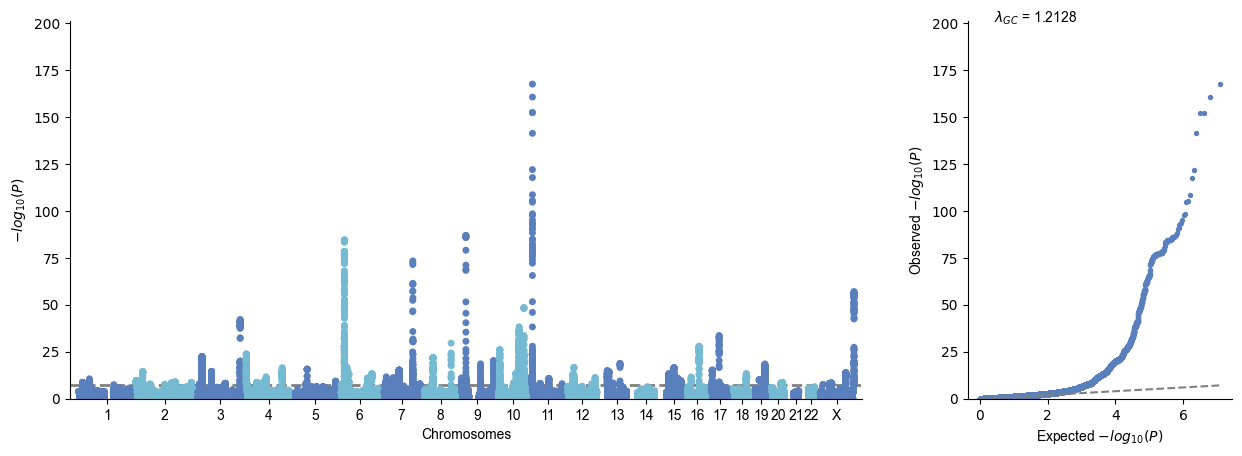

In [4]:
mysumstats.plot_mqq()

# basic check -> standardize, harmonize and sanity check

In [5]:
mysumstats.filter_out(gt={"P":0.005})

Mon Aug  8 17:26:41 2022 Start filtering values:
Mon Aug  8 17:26:51 2022  -Removing 12341200 variants with P > 0.005 ...
Mon Aug  8 17:26:51 2022 Finished filtering values.


In [6]:
mysumstats.basic_check()

Mon Aug  8 17:26:51 2022 Start to check IDs...
Mon Aug  8 17:26:51 2022  -Current Dataframe shape : 216536  x  12
Mon Aug  8 17:26:51 2022  -Checking if SNPID is chr:pos:ref:alt...(separator: - ,: , _)
Mon Aug  8 17:26:53 2022 Start to fix chromosome notation...
Mon Aug  8 17:26:53 2022  -Current Dataframe shape : 216536  x  12
Mon Aug  8 17:26:54 2022  -Vairants with fixable chromosome notations: 7961
Mon Aug  8 17:26:54 2022  -Converting to string datatype and UPPERCASE...
Mon Aug  8 17:26:54 2022  -Stripping chr prefix if exists : CHR_-.0...
Mon Aug  8 17:26:54 2022  -Identified  7961  variants on sex chromosomes...
Mon Aug  8 17:26:54 2022  -Standardizing sex chromosome notations: X Y MT  to 23,24,25...
Mon Aug  8 17:26:54 2022  -No unrecognized chromosome notations...
Mon Aug  8 17:26:54 2022 Start to fix basepair positions...
Mon Aug  8 17:26:54 2022  -Current Dataframe shape : 216536  x  12
Mon Aug  8 17:26:55 2022  -Position upper_bound is: 250,000,000
Mon Aug  8 17:26:55 2022 

# infer genome build

In [7]:
mysumstats.infer_build()

Mon Aug  8 17:27:05 2022  -Start to infer genome build version using hapmap3 SNPs...
Mon Aug  8 17:27:05 2022  -Loading Hapmap3 variants data...
Mon Aug  8 17:27:07 2022  -chr:pos will be used for matching...
Mon Aug  8 17:27:09 2022  -Matching variants for hg19: num_hg19= 25063
Mon Aug  8 17:27:09 2022  -Matching variants for hg38: num_hg38= 257
Mon Aug  8 17:27:09 2022  -Since num_hg19>num_hg38, assigning genome build hg19...


# get lead variants based on a given sliding window size

In [8]:
mysumstats.get_lead()

Mon Aug  8 17:27:10 2022 Start extracting lead variants...
Mon Aug  8 17:27:10 2022  -Processing 216536 variants...
Mon Aug  8 17:27:10 2022  -Significance threshold : 5e-08
Mon Aug  8 17:27:10 2022  -Sliding window size: 500  kb
Mon Aug  8 17:27:10 2022  -Found 9461 significant variants in total...
Mon Aug  8 17:27:11 2022  -Identified 89 lead variants!


,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
96739,1:22068326_A_G,1,22068326,G,A,0.7550,0.0621,0.0103,1.629000e-09,191764,++++,1960099
213860,1:51103268_T_C,1,51103268,C,T,0.7953,-0.0802,0.0120,2.519000e-11,191764,----,1960099
534095,1:154309595_TA_T,1,154309595,TA,T,0.0947,-0.0915,0.0166,3.289000e-08,191764,----,1960399
969974,2:640986_CACAT_C,2,640986,C,CACAT,0.9006,-0.0946,0.0150,2.665000e-10,191764,----,1960399
1091807,2:27734972_G_A,2,27734972,G,A,0.5605,0.0691,0.0088,3.897000e-15,191764,++++,1960099
...,...,...,...,...,...,...,...,...,...,...,...,...
12272930,X:21569920_A_G,23,21569920,G,A,0.3190,0.0423,0.0076,2.616000e-08,191764,++++,1960099
12341406,X:48724648_CAA_C,23,48724648,C,CAA,0.6260,-0.0602,0.0103,4.576000e-09,191764,----,1960399
12350767,X:57170781_A_AT,23,57170781,AT,A,0.3003,-0.0447,0.0076,4.583000e-09,191764,----,1960399
12469290,X:117915163_T_TA,23,117915163,TA,T,0.5560,0.0548,0.0071,9.818000e-15,191764,++++,1960399


# customized mqq plot

Mon Aug  8 17:27:11 2022 Start to plot manhattan/qq plot with the following basic settings:
Mon Aug  8 17:27:11 2022  -Genome-wide significance level is set to 5e-08 ...
Mon Aug  8 17:27:11 2022  -Raw input contains 216536 variants...
Mon Aug  8 17:27:11 2022  -Plot layout mode is : mqq
Mon Aug  8 17:27:11 2022  -Variants to pinpoint : 9:22132729_A_G,6:20688121_T_A,9:22132729_A_G,15:62394264_G_C
Mon Aug  8 17:27:11 2022  -Loci to highlight : 7:127253550_C_T,19:46166604_C_T
Mon Aug  8 17:27:11 2022  -Highlight_window is set to:  1000  kb
Mon Aug  8 17:27:11 2022  -Variants to pinpoint : 7:127253550_C_T,19:46166604_C_T
Mon Aug  8 17:27:11 2022 Start conversion and QC:
Mon Aug  8 17:27:11 2022  -Removed 0 variants with nan in CHR or POS column ...
Mon Aug  8 17:27:11 2022  -Removed 0 variants with nan in EAF column ...
Mon Aug  8 17:27:11 2022  -Removed 0 variants with nan in P column ...
Mon Aug  8 17:27:11 2022  -P values are being converted to -log10(P)...
Mon Aug  8 17:27:11 2022  -Sa

(<Figure size 4500x1500 with 2 Axes>, <gwaslab.Log.Log at 0x7fd85c0a97c0>)

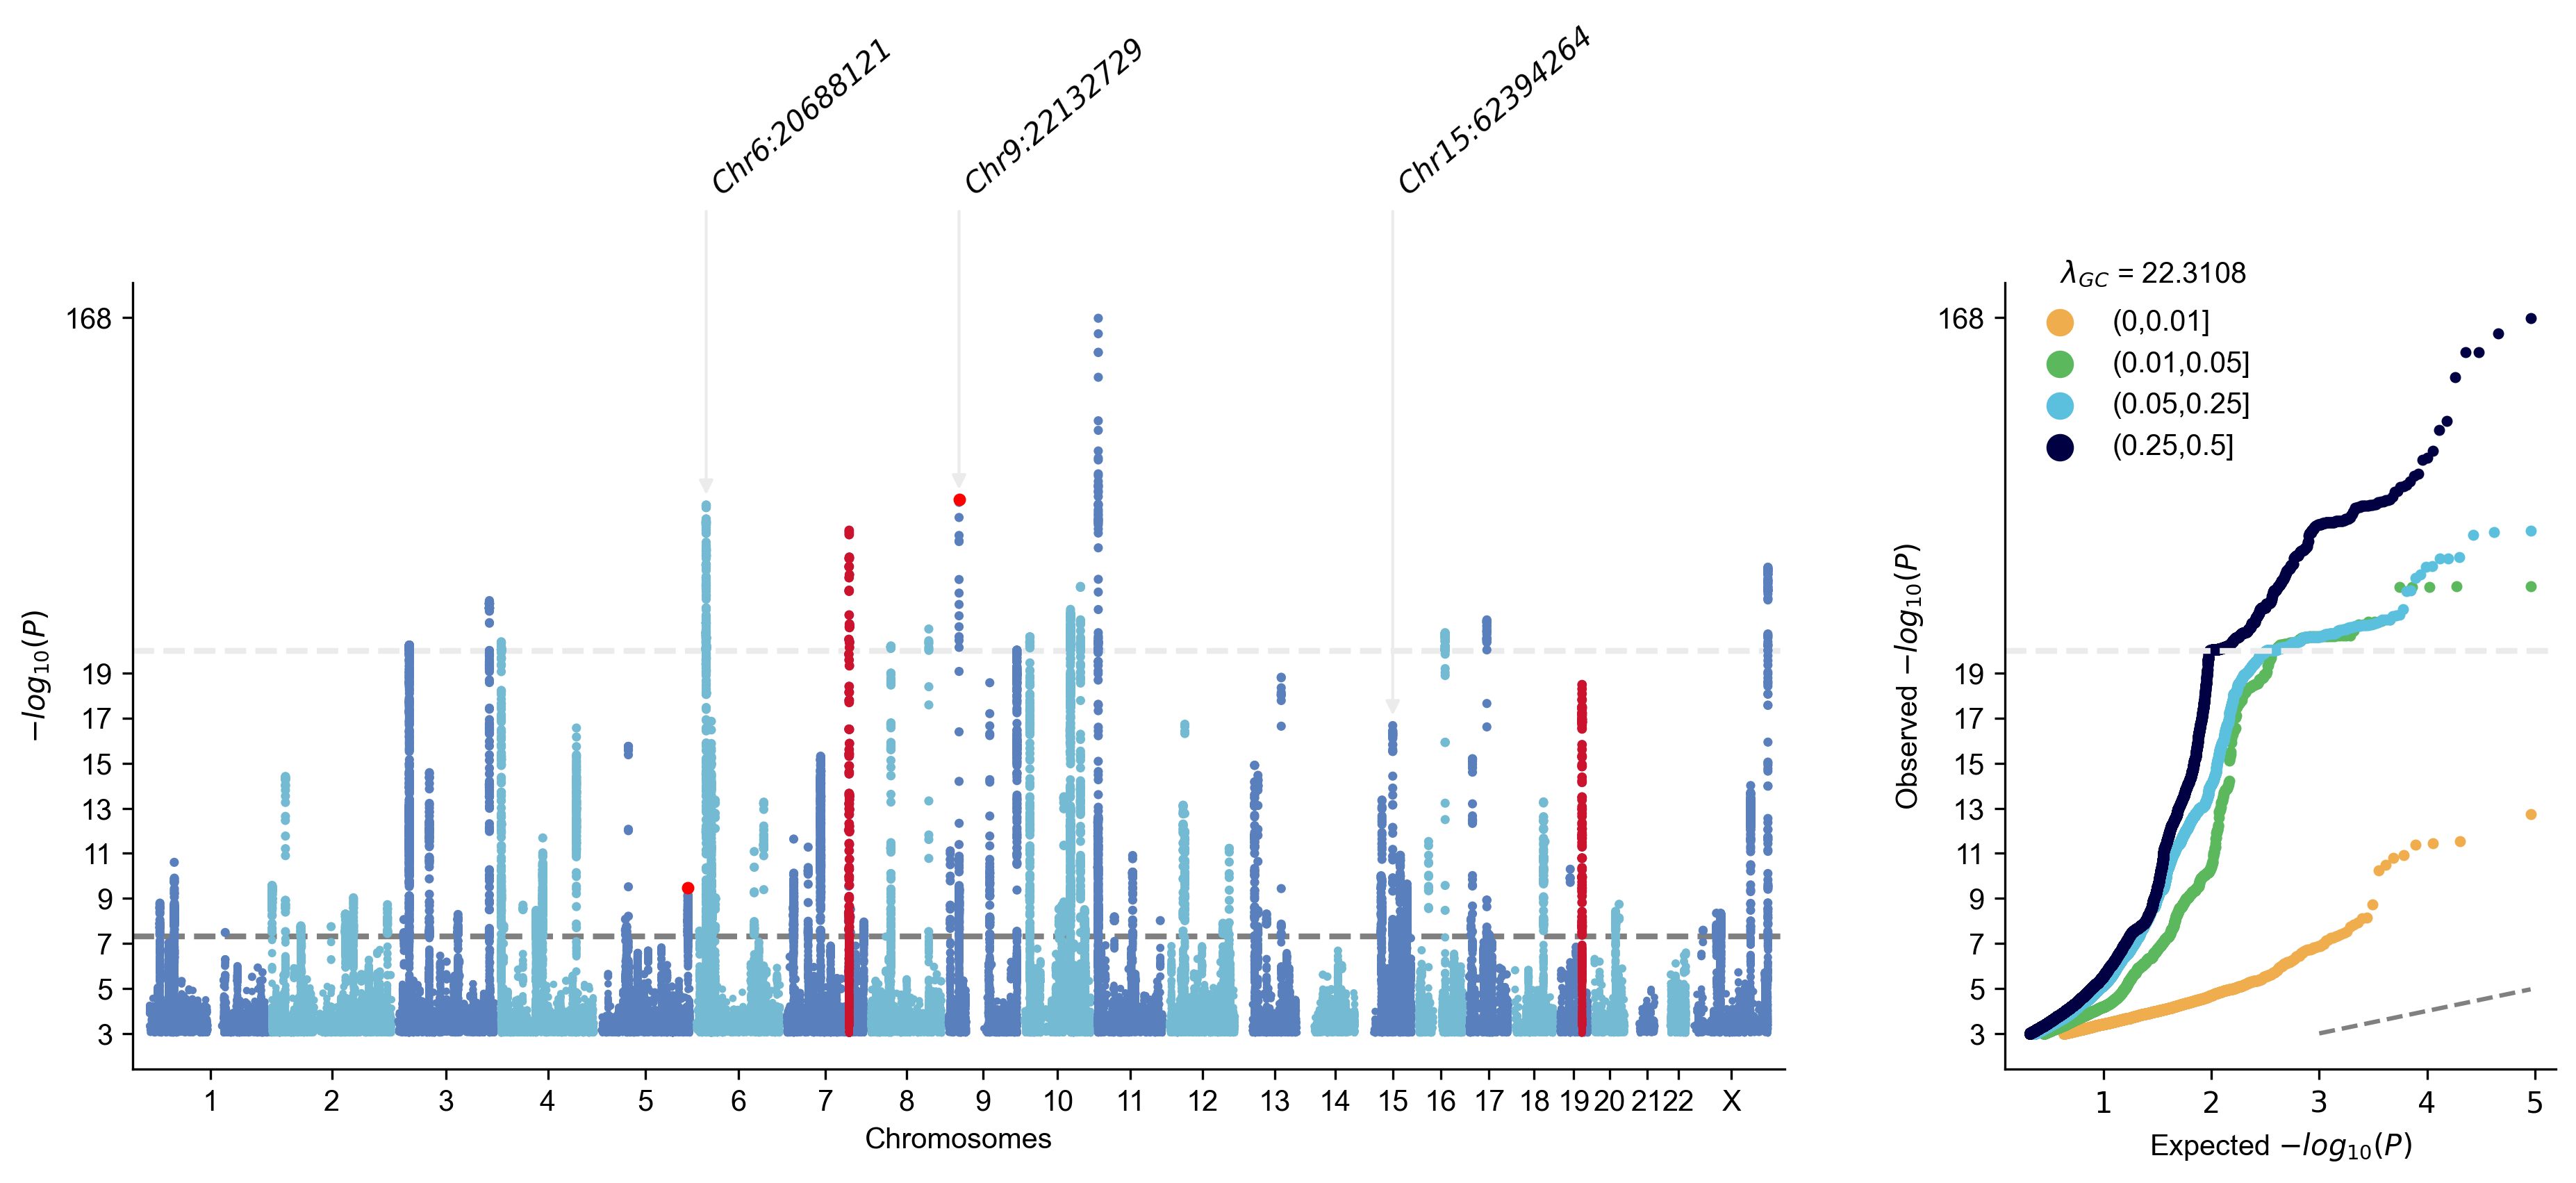

In [9]:
mysumstats.plot_mqq(snpid="SNPID",mode="mqq",
                  cut=20,skip=3, eaf="EAF",
                  anno=True,anno_set=["9:22132729_A_G","6:20688121_T_A","9:22132729_A_G","15:62394264_G_C"] ,
                  pinpoint=["9:22132729_A_G","5:176513896_C_A"], 
                  highlight=["7:127253550_C_T","19:46166604_C_T"],
                  highlight_windowkb =1000,
                  stratified=True,
                  marker_size=(5,10),
                  figargs={"figsize":(15,5),"dpi":300})

# fix id separator

In [10]:
mysumstats.fix_id(fixsep=True)

Mon Aug  8 17:27:14 2022 Start to check IDs...
Mon Aug  8 17:27:14 2022  -Current Dataframe shape : 216536  x  12
Mon Aug  8 17:27:14 2022  -Checking if SNPID is chr:pos:ref:alt...(separator: - ,: , _)
Mon Aug  8 17:27:15 2022  -Replacing [_-] in SNPID with ":" ...


# checking sumstats summary

In [11]:
mysumstats.summary()

Values  Percentage
Category Items                                                  
META     Row_num                              216536         NaN
         Column_num                                5         NaN
         Column_names           SNPID,EAF,P,N,STATUS         NaN
         Last_checked_time  Mon Aug  8 17:27:15 2022         NaN
MISSING  Missing_total                             0        0.00
MAF      Common                               167055       77.15
         Low_frequency                         23640       10.92
         Rare                                  25779       11.91
P        Minimum                           2.58e-168        0.00
         Significant                            9461        4.37
         Suggestive                            18641        8.61
STATUS   1960099                              193239       89.24
         1960399                               23297       10.76

In [12]:
mysumstats.lookup_status()

,Genome_Build,rsID&SNPID,CHR&POS,Stadardize&Normalize,Align,Panlidromic_SNP&Indel,Count,Percentage(%)
1960099,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Unchecked,Unchecked,193239,89.24
1960399,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized & normalized indel,Unchecked,Unchecked,23297,10.76


In [10]:
mysumstats.filter_in(eq={"CHR":3})

Mon Aug  8 16:24:22 2022 Start filtering values:
Mon Aug  8 16:24:22 2022  -Keeping 897530 variants with CHR = 3 ...
Mon Aug  8 16:24:22 2022 Finished filtering values.


# harmonize & annotate rsID

In [11]:
mysumstats.harmonize( basic_check=False,
                    ref_seq="/Users/he/Documents/Mydata/human_g1k_v37.fasta",
                    ref_rsid_tsv="/Users/he/Documents/Mydata/EAS_1kg_af_dbsnp151.ALL.tsv",
                    ref_rsid_vcf="/Users/he/Documents/Mydata/All_20180423.vcf.gz",
                    ref_infer="/Users/he/Documents/Mydata/eas_1kg_af/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz",ref_alt_freq="AF")

Mon Aug  8 16:24:23 2022 Start to check if NEA is aligned with reference sequence...
Mon Aug  8 16:24:23 2022  -Current Dataframe shape : 897530  x  12
Mon Aug  8 16:24:23 2022  -Reference genome fasta file: /Users/he/Documents/Mydata/human_g1k_v37.fasta
Mon Aug  8 16:24:23 2022  -Checking records: 1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  X  Y  
Mon Aug  8 16:25:37 2022  -Variants allele on given reference sequence :  380385
Mon Aug  8 16:25:37 2022  -Variants flipped :  443233
Mon Aug  8 16:25:37 2022   -Raw Matching rate :  91.76%
Mon Aug  8 16:25:37 2022  -Variants inferred reverse_complement :  0
Mon Aug  8 16:25:37 2022  -Variants inferred reverse_complement_flipped :  0
Mon Aug  8 16:25:37 2022  -Both allele on genome + unable to distinguish :  73912
Mon Aug  8 16:25:37 2022  -Variants not on given reference sequence :  0
Mon Aug  8 16:25:37 2022  -Current Dataframe shape : 897530  x  12
Mon Aug  8 16:25:42 2022 Start to flip allele-specific 

# checking sumstats summary

In [12]:
mysumstats.summary()

Values  Percentage
Category Items                                                   
META     Row_num                               897530         NaN
         Column_num                                 6         NaN
         Column_names       SNPID,rsID,EAF,P,N,STATUS         NaN
         Last_checked_time   Mon Aug  8 16:36:24 2022         NaN
MISSING  Missing_total                           5414        0.60
         Missing_rsID                            5414        0.60
MAF      Common                                444823       49.56
         Low_frequency                         155310       17.30
         Rare                                  296892       33.08
P        Minimum                            6.112e-43        0.00
         Significant                             1145        0.13
         Suggestive                              1455        0.16
STATUS   1960010                               377554       42.07
         1960000                               310637       34.61
         1960001                                59420        6.62
         1960011                                58876        6.56
         1960364                                40578        4.52
         1960363                                33086        3.69
         1960007                                 5272        0.59
         1960017                                 5077        0.57
         1960309                                 4910        0.55
         1960319                                 1546        0.17
         1960368                                  248        0.03
         1960012                                  180        0.02
         1960002                                  146        0.02

In [13]:
mysumstats.lookup_status()

,Genome_Build,rsID&SNPID,CHR&POS,Stadardize&Normalize,Align,Panlidromic_SNP&Indel,Count,Percentage(%)
1960000,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Match: NEA=REF,Not_palindromic_SNPs,310637,34.61
1960001,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Match: NEA=REF,Palindromic+strand,59420,6.62
1960002,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Match: NEA=REF,Palindromic-strand_fixed,146,0.02
1960007,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Match: NEA=REF,Indistinguishable,5272,0.59
1960010,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Flipped_fixed,Not_palindromic_SNPs,377554,42.07
1960011,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Flipped_fixed,Palindromic+strand,58876,6.56
1960012,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Flipped_fixed,Palindromic-strand_fixed,180,0.02
1960017,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Flipped_fixed,Indistinguishable,5077,0.57
1960309,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized & normalized indel,Match: NEA=REF,Unchecked,4910,0.55
1960319,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized & normalized indel,Flipped_fixed,Unchecked,1546,0.17


# checking allele frequency

In [14]:
mysumstats.check_af(ref_infer="/Users/he/Documents/Mydata/eas_1kg_af/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz",ref_alt_freq="AF",n_cores=3)

Mon Aug  8 16:36:54 2022 Start to check the difference between EAF and refence vcf alt frequency ...
Mon Aug  8 16:36:54 2022  -Current Dataframe shape : 897530  x  13
Mon Aug  8 16:36:54 2022  -Reference vcf file: /Users/he/Documents/Mydata/eas_1kg_af/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz
Mon Aug  8 16:36:54 2022  -CPU Cores to use : 3
Mon Aug  8 16:36:54 2022  -Alternative allele frequency in INFO: AF
Mon Aug  8 16:36:57 2022  -Checking variants: 897530
Mon Aug  8 16:46:37 2022  - DAF min: 0.9990000128746033
Mon Aug  8 16:46:37 2022  - DAF max: -0.2375890016555786
Mon Aug  8 16:46:37 2022  - abs(DAF) min: 0.9990000128746033
Mon Aug  8 16:46:37 2022  - abs(DAF) max: 0.0
Mon Aug  8 16:46:37 2022  - DAF sd: 0.0353230957161458
Mon Aug  8 16:46:37 2022  - abs(DAF) sd: 0.027713877051816535


Start to plot Reference frequency vs Effect allele frequency plot...
 -Plotting valriants:897274
 -Plotting regression line...
 -Beta =  0.9935882294223202
 -Intercept =  0.0014036737490379925
 -R2 =  0.9913368005203206
 -Threshold : 0.16
 -Variants with relatively large DAF :  1486
 -Percentage for variants with relatively large DAF :  0.0016561273368001302


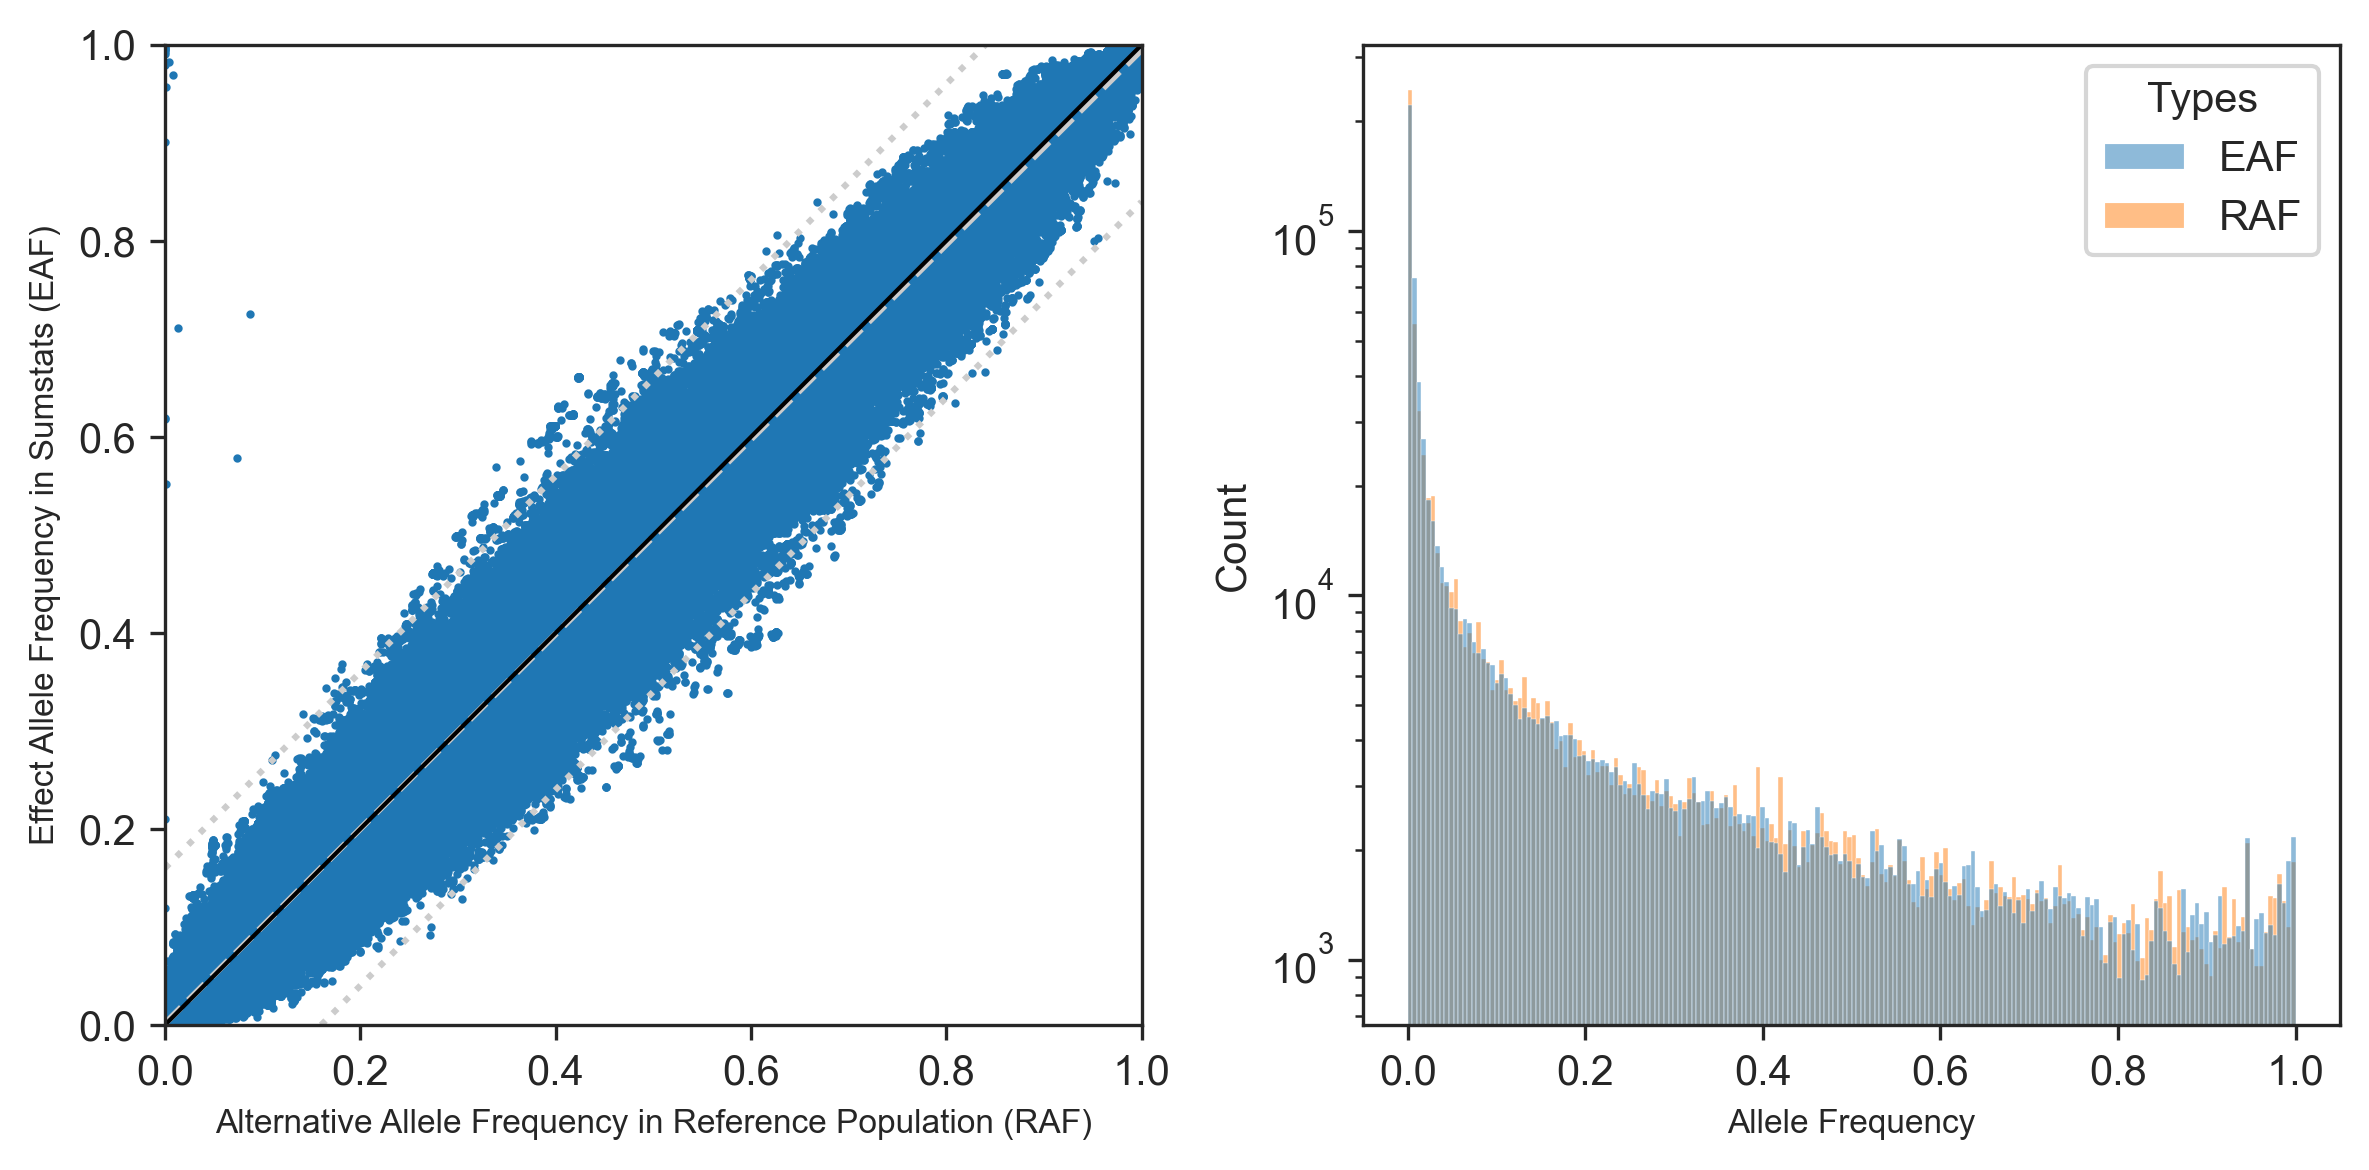

In [15]:
mysumstats.plot_daf()

# filtering values

In [16]:
mysumstats.filter_out(lt={"DAF":-0.16},gt={"DAF":0.16})

Mon Aug  8 16:46:44 2022 Start filtering values:
Mon Aug  8 16:46:44 2022  -Removing 772 variants with DAF > 0.16 ...
Mon Aug  8 16:46:44 2022  -Removing 714 variants with DAF < -0.16 ...
Mon Aug  8 16:46:44 2022 Finished filtering values.


# filtering regions

In [18]:
mysumstats.filter_region_out(high_ld=True)

Mon Aug  8 16:47:13 2022 Start to filter out variants if in intervals defined in bed files:
Mon Aug  8 16:47:13 2022  -Current Dataframe shape : 895788  x  14
Mon Aug  8 16:47:13 2022  -Loading bed format file for hg19
Mon Aug  8 16:47:13 2022  -Bed file < 100 lines: using pd IntervalIndex... 
Mon Aug  8 16:47:17 2022  -Number of variants in the specified regions to exclude: 0
Mon Aug  8 16:47:17 2022  -Number of variants left: 852035
Mon Aug  8 16:47:17 2022 Finished filtering out variants.


In [19]:
mysumstats.filter_region_out(path="/Users/he/work/gwaslab/src/gwaslab/data/high_ld/high_ld_hla_hg19.bed.gz")

Mon Aug  8 16:47:17 2022 Start to filter out variants if in intervals defined in bed files:
Mon Aug  8 16:47:17 2022  -Current Dataframe shape : 852035  x  14
Mon Aug  8 16:47:17 2022  -Loading bed format file:  /Users/he/work/gwaslab/src/gwaslab/data/high_ld/high_ld_hla_hg19.bed.gz
Mon Aug  8 16:47:17 2022  -Bed file < 100 lines: using pd IntervalIndex... 
Mon Aug  8 16:47:21 2022  -Number of variants in the specified regions to exclude: 0
Mon Aug  8 16:47:21 2022  -Number of variants left: 852035
Mon Aug  8 16:47:21 2022 Finished filtering out variants.


In [20]:
mysumstats.data

,SNPID,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS,DAF
0,3:60596:C:A,rs13067307,3,60596,A,C,0.8934,0.0094,0.0179,0.5988,191764,--++,1960010,-0.046084
1,3:61044:T:C,rs9755941,3,61044,C,T,0.9143,0.0113,0.0172,0.5093,191764,-0++,1960000,-0.027168
2,3:61113:A:T,rs9756992,3,61113,T,A,0.9131,0.0107,0.0171,0.5305,191764,-0++,1960001,-0.026384
3,3:61305:C:A,rs187779789,3,61305,A,C,0.0030,-0.0081,0.1114,0.9423,191764,-+-+,1960010,0.002008
4,3:61466:G:C,rs13081384,3,61466,C,G,0.0708,-0.0104,0.0185,0.5753,191764,++--,1960011,0.013260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897525,3:197840299:G:A,rs77571208,3,197840299,A,G,0.0065,-0.0783,0.0771,0.3099,191764,+---,1960010,0.005508
897526,3:197845586:A:C,rs549154860,3,197845586,C,A,0.0042,-0.0851,0.0824,0.3018,191764,+---,1960000,0.003208
897527,3:197849658:C:T,rs531872269,3,197849658,T,C,0.0046,-0.0882,0.0848,0.2986,191764,+---,1960010,0.003608
897528,3:197852736:C:T,rs183689595,3,197852736,T,C,0.0044,-0.0908,0.0869,0.2958,191764,+---,1960010,0.003408


# output sumstats

In [21]:
mysumstats.to_format("./mysumstats",fmt="ldsc",hapmap3=True,exclude_hla=True)

Mon Aug  8 16:47:33 2022 Output sumstats to format: ldsc
Mon Aug  8 16:47:33 2022  -Excluding variants in HLA region ...
Mon Aug  8 16:47:33 2022  -Exclude 0 variants in HLA region.
Mon Aug  8 16:47:33 2022  -Processing 852035 raw variants...
Mon Aug  8 16:47:33 2022  -Loading Hapmap3 variants data...
Mon Aug  8 16:47:35 2022  -Extract 73873 variants in Hapmap3 datasets for build 19.
Mon Aug  8 16:47:35 2022  -Formatting statistics ...
Mon Aug  8 16:47:35 2022  -Float statistics formats:
Mon Aug  8 16:47:35 2022   - Columns: ['EAF', 'BETA', 'SE', 'P', 'DAF']
Mon Aug  8 16:47:35 2022   - Output formats: ['{:.4g}', '{:.4f}', '{:.4f}', '{:.4e}', '{:.4f}']
Mon Aug  8 16:47:35 2022  -Saving sumstats in ldsc format at Hapmap3 variants to : 
Mon Aug  8 16:47:35 2022  -./mysumstats.hapmap3.noMHC.ldsc
Mon Aug  8 16:47:35 2022 Saving log file...
Mon Aug  8 16:47:35 2022  -Save log file to :  ./mysumstats.hapmap3.noMHC.ldsc.log
